
![alt text](https://i.imgur.com/CO69Gqw.jpg)      

# COVID-19 - Pandemic in India!

## About COVID-19

The **coronavirus (COVID-19)** pandemic is the greatest global humanitarian challenge the world has faced since World War II. The pandemic virus has spread widely, and the number of cases is rising daily. The government is working to slow down its spread.

Till date it has spread across 215 countries infecting 5,491,194 people and killing 346,331 so far. In India, as many as 138,536 COVID-19 cases have been reported so far. Of these, 57,692 have recovered and 4,024 have died. 
COVID19 

**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

![alt text](https://i.imgur.com/nf2kMhF.jpg)


## Problem Statement:

India has responded quickly, implementing a proactive, nationwide, lockdown, to flatten the curve and use the time to plan and resource responses adequately. As of 23rd May 2020, India has witnessed 3720 deaths from 32 States and Union Territories, with a total of 123202 confirmed cases due to COVID-19. Globally the Data Scientists are using AI and machine learning to analyze, predict, and take safety measures against COVID-19 in India. 


We need a explore the COVID situation in India and the world, and strong model that predicts how the virus could spread across India in the next 15 days.
###Steps to be achieved:
- Analyze the present condition in India
- Collect the COVID-19 data from websites
- Figure out the death rate and cure rate per 100 citizens across the affected states
- Plotting charts to visualize the following: 
 - Age group distribution of affected patients
 - Total sample tests done till date
 - Growth rate of COVID in top 15 states
 - Top 10 States in each health facility
 - State wise testing insights
- ICMR testing centres in each state
- Use Facebook Prophet to predict the confirmed cases in India
- Use ARIMA time series model to predict the confirmed cases in India
- Compare the Indian COVID-19 cases on global level

### Importing the required libraries

In [1]:
# importing the required libraries
# !pip install folium
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in India


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
###COVID-19 in India - Timeline
 <br>


![](https://imgur.com/uPzNx0j.png)

## Recent COVID-19 updates in India

- Sikkim on Saturday reported its first +ve COVID-19 case
- With over 6,500 fresh cases, the Covid in India rose to 1,25,101 on Saturday morning, with 3,720 fatalities
- West Bengal asks Railways not to send migrant trains to State till May 26 in view of Cyclone Amphan
- 196 new COVID 19 positive cases were reported in Karnataka on Saturday
- Complete lockdown in Bengaluru on Sunday. 
 - Bruhat Bengaluru Mahanagara Palike (BBMP) Commissioner B.H. Anil Kumar said the conditions and restrictions on Sunday will be similar to that under coronavirus lockdown 1.0.


## How is AI-ML useful in fighting the COVID-19 pandemic?
- Medical resource optimization
- Ensuring demand planning stability
- Contact tracing 
- Situational awareness and critical response analysis


## 1.1 Scraping the datasets from the [official Govt. website](https://www.mohfw.gov.in)


In [2]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
import json
import csv
import numpy as np
# for scraping web contents
# from bs4 import BeautifulSoup

In [3]:
raw_1 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
raw_2 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
raw_3 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
raw_4 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
raw_5 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
raw_6 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')
raw_7 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')
raw_8 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data8.csv')
raw_9 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data9.csv')
raw_10 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data10.csv')
raw_11 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data11.csv')
raw_12 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data12.csv')
raw_13 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data13.csv')
raw_14 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data14.csv')
raw_15 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data15.csv')
raw_16 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data16.csv')

In [4]:
full_data = pd.concat([raw_1,
raw_2,
raw_3,
raw_4,
raw_5,
raw_6,
raw_7,
raw_8,
raw_9,
raw_10,
raw_11,
raw_12,
raw_13,
raw_14,
raw_15,
raw_16])

print(full_data.shape)
full_data.head()

(352525, 22)


,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases,Entry_ID
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1.0,NaN
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1.0,NaN


## Daily Cases

In [5]:
day_wise = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

day_wise.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


## State Wise

In [6]:
state_wise = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

state_wise.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,6877073,5871898,106037,898090,08/10/2020 21:24:52,1048,TT,44085,47436,483,NaN
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,449,MH,0,0,0,[Sep 9] :239 cases have been removed from the ...
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,0,AP,0,0,0,NaN
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,19,KA,10704,9613,101,NaN
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,0,TN,5088,5718,68,[July 22]: 444 backdated deceased entries adde...


In [7]:
from datetime import date

state_wise_daily = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

state_wise_daily = state_wise_daily.melt(id_vars=['Date','Status'],
                                        value_vars=state_wise_daily.columns[2:],
                                        var_name='State',value_name='Count')

state_wise_daily = state_wise_daily.pivot_table(index=['Date','State'],
                                        columns=['Status'],values='Count').reset_index()

state_codes = {code:state for code, state in zip(state_wise['State_code'], state_wise['State'])}
state_codes['DD'] = 'Daman and Diu'
state_wise_daily['State_Name'] = state_wise_daily['State'].map(state_codes)

state_wise_daily

Status,Date,State,Confirmed,Deceased,Recovered,State_Name
0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,01-Apr-20,AS,15,0,0,Assam
4,01-Apr-20,BR,3,0,0,Bihar
...,...,...,...,...,...,...
8107,31-May-20,TT,8789,222,4928,Total
8108,31-May-20,UN,448,0,0,State Unassigned
8109,31-May-20,UP,374,4,192,Uttar Pradesh
8110,31-May-20,UT,158,0,0,Uttarakhand


In [9]:
state_wise.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,6877073,5871898,106037,898090,08/10/2020 21:24:52,1048,TT,44085,47436,483,NaN
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,449,MH,0,0,0,[Sep 9] :239 cases have been removed from the ...
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,0,AP,0,0,0,NaN
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,19,KA,10704,9613,101,NaN
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,0,TN,5088,5718,68,[July 22]: 444 backdated deceased entries adde...


# Data Cleaning

In [10]:
# date-time information
# =====================
#saving a copy of the dataframe
df_India = state_wise.copy()
# today's date
now  = datetime.now()
# format date to month-day-year
df_India['Date'] = now.strftime("%m/%d/%Y") 

# add 'Date' column to dataframe
df_India['Date'] = pd.to_datetime(df_India['Date'], format='%m/%d/%Y')

df_India.head(36)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Date
0,Total,6877073,5871898,106037,898090,08/10/2020 21:24:52,1048,TT,44085,47436,483,NaN,2020-10-08
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,449,MH,0,0,0,[Sep 9] :239 cases have been removed from the ...,2020-10-08
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,0,AP,0,0,0,NaN,2020-10-08
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,19,KA,10704,9613,101,NaN,2020-10-08
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,0,TN,5088,5718,68,[July 22]: 444 backdated deceased entries adde...,2020-10-08
5,Uttar Pradesh,427459,378662,6245,42552,08/10/2020 21:21:49,0,UP,3133,3690,45,NaN,2020-10-08
6,Delhi,300833,272948,5643,22242,08/10/2020 21:13:59,0,DL,2726,2643,27,[July 14]: Value for the total tests conducted...,2020-10-08
7,West Bengal,284030,249737,5439,28854,08/10/2020 21:21:51,0,WB,3526,2970,63,NaN,2020-10-08
8,Odisha,244142,216984,1027,26131,08/10/2020 21:14:03,0,OR,3144,3312,16,[July 12th] :20 non-covid deaths reported in s...,2020-10-08
9,Kerala,258851,167256,931,90579,08/10/2020 20:37:52,85,KL,5445,7003,24,Mahe native who expired in Kannur included in ...,2020-10-08


In [11]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

# add latitude column based on 'Name of State / UT' column
df_India['Latitude'] = df_India['State'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_India['Longitude'] = df_India['State'].map(long)

df_India.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Date,Latitude,Longitude
0,Total,6877073,5871898,106037,898090,08/10/2020 21:24:52,1048,TT,44085,47436,483,NaN,2020-10-08,NaN,NaN
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,449,MH,0,0,0,[Sep 9] :239 cases have been removed from the ...,2020-10-08,19.7515,75.7139
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,0,AP,0,0,0,NaN,2020-10-08,15.9129,79.7400
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,19,KA,10704,9613,101,NaN,2020-10-08,15.3173,75.7139
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,0,TN,5088,5718,68,[July 22]: 444 backdated deceased entries adde...,2020-10-08,11.1271,78.6569


In [12]:

# rename columns
    
df_India = df_India.rename(columns={'Delta_Recovered' :'Cured/Discharged', 
                                      'Total Confirmed cases *': 'Confirmed', 
                                      'Total Confirmed cases ': 'Confirmed', 
                                      'Total Confirmed cases* ': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged':'Delta_Cured'})
df_India = df_India.rename(columns={'State':'State/UnionTerritory'})
df_India = df_India.rename(columns={'State':'State/UnionTerritory'})

df_India = df_India.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
                                                      'Total Confirmed cases',x))
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [13]:
# unique state names
df_India['State/UnionTerritory'].unique()

array(['Total', 'Maharashtra', 'Andhra Pradesh', 'Karnataka',
       'Tamil Nadu', 'Uttar Pradesh', 'Delhi', 'West Bengal', 'Odisha',
       'Kerala', 'Telangana', 'Bihar', 'Assam', 'Gujarat', 'Rajasthan',
       'Madhya Pradesh', 'Haryana', 'Chhattisgarh', 'Punjab', 'Jharkhand',
       'Jammu and Kashmir', 'Uttarakhand', 'Goa', 'Puducherry', 'Tripura',
       'Himachal Pradesh', 'Chandigarh', 'Manipur', 'Arunachal Pradesh',
       'Meghalaya', 'Nagaland', 'Ladakh', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Mizoram',
       'State Unassigned', 'Lakshadweep'], dtype=object)

In [14]:
# number of missing values 
df_India.isna().sum()

State/UnionTerritory     0
Confirmed                0
Recovered                0
Deaths                   0
Active                   0
Last_Updated_Time        0
Migrated_Other           0
State_code               0
Delta_Confirmed          0
Delta_Cured              0
Delta_Deaths             0
State_Notes             26
Date                     0
Latitude                 5
Longitude                5
dtype: int64

In [15]:
# number of unique values 
df_India.nunique()

State/UnionTerritory    38
Confirmed               37
Recovered               37
Deaths                  36
Active                  37
Last_Updated_Time       38
Migrated_Other          13
State_code              38
Delta_Confirmed         21
Delta_Cured             21
Delta_Deaths            19
State_Notes             12
Date                     1
Latitude                33
Longitude               30
dtype: int64

In [16]:
# fix datatype
df_India['Date'] = pd.to_datetime(df_India['Date'])

In [17]:
# rename state/UT names
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

## Final dataframe

In [18]:
df_India = df_India.drop(['Migrated_Other','State_Notes'], axis=1)
df_India = df_India.drop([0], axis=0)

df_India.head(36)

,State/UnionTerritory,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Cured,Delta_Deaths,Date,Latitude,Longitude
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,MH,0,0,0,2020-10-08,19.7515,75.7139
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,AP,0,0,0,2020-10-08,15.9129,79.7400
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,KA,10704,9613,101,2020-10-08,15.3173,75.7139
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,TN,5088,5718,68,2020-10-08,11.1271,78.6569
5,Uttar Pradesh,427459,378662,6245,42552,08/10/2020 21:21:49,UP,3133,3690,45,2020-10-08,26.8467,80.9462
6,Delhi,300833,272948,5643,22242,08/10/2020 21:13:59,DL,2726,2643,27,2020-10-08,28.7041,77.1025
7,West Bengal,284030,249737,5439,28854,08/10/2020 21:21:51,WB,3526,2970,63,2020-10-08,22.9868,87.8550
8,Odisha,244142,216984,1027,26131,08/10/2020 21:14:03,OR,3144,3312,16,2020-10-08,20.9517,85.0985
9,Kerala,258851,167256,931,90579,08/10/2020 20:37:52,KL,5445,7003,24,2020-10-08,10.8505,76.2711
10,Telangana,206644,179075,1201,26368,08/10/2020 10:44:51,TG,1896,2067,12,2020-10-08,NaN,NaN


In [19]:
# complete data info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   State/UnionTerritory  37 non-null     object        
 1   Confirmed             37 non-null     int64         
 2   Recovered             37 non-null     int64         
 3   Deaths                37 non-null     int64         
 4   Active                37 non-null     int64         
 5   Last_Updated_Time     37 non-null     object        
 6   State_code            37 non-null     object        
 7   Delta_Confirmed       37 non-null     int64         
 8   Delta_Cured           37 non-null     int64         
 9   Delta_Deaths          37 non-null     int64         
 10  Date                  37 non-null     datetime64[ns]
 11  Latitude              33 non-null     float64       
 12  Longitude             33 non-null     float64       
dtypes: datetime64[ns](1), 

## Save as .csv file

In [ ]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+' - COVID-19_India_preprocessed.csv'

# location for saving the file
file_loc = '/content/'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

## 1.2 Analysing COVID19 Cases in India

In [21]:
from datetime import date



total_cases = df_India['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date ',date.today(),':', total_cases)

Total number of confirmed COVID 2019 cases across India till date  2020-10-08 : 6877073


In [22]:
#Learn how to highlight your dataframe
df_temp = df_India.drop(['Latitude', 'Longitude', 'Date'], axis = 1) #Removing Date, Latitude and Longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,State_code,Delta_Confirmed,Delta_Cured,Delta_Deaths
1,Maharashtra,1480489,1196441,39072,244527,07/10/2020 22:32:57,MH,0,0,0
2,Andhra Pradesh,734427,678828,6086,49513,07/10/2020 17:50:55,AP,0,0,0
3,Karnataka,679356,552519,9675,117143,08/10/2020 21:13:54,KA,10704,9613,101
4,Tamil Nadu,640943,586454,10052,44437,08/10/2020 21:13:56,TN,5088,5718,68
5,Uttar Pradesh,427459,378662,6245,42552,08/10/2020 21:21:49,UP,3133,3690,45
6,Delhi,300833,272948,5643,22242,08/10/2020 21:13:59,DL,2726,2643,27
7,West Bengal,284030,249737,5439,28854,08/10/2020 21:21:51,WB,3526,2970,63
8,Odisha,244142,216984,1027,26131,08/10/2020 21:14:03,OR,3144,3312,16
9,Kerala,258851,167256,931,90579,08/10/2020 20:37:52,KL,5445,7003,24
10,Telangana,206644,179075,1201,26368,08/10/2020 10:44:51,TG,1896,2067,12


In [23]:
today = now.strftime("%Y_%m_%d")
total_cured = df_India['Delta_Cured'].sum()
recovered = df_India['Recovered'].sum()
print("Total people who were recovered as of "+today+" are: ", recovered)
total_cases = df_India['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df_India['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases-recovered-total_death
print("Total active COVID19 cases as of "+today+" are: ",total_active)

Total people who were recovered as of 2020_10_08 are:  5871898
Total people who were detected COVID+ve as of 2020_10_08 are:  6877073
Total people who died due to COVID19 as of 2020_10_08 are:  106037
Total active COVID19 cases as of 2020_10_08 are:  899138


In [24]:
#Total Active  is the Total cases - (Number of death + Cured)
df_India['Total Active'] = df_India['Confirmed'] - (df_India['Deaths'] + df_India['Recovered'])
total_active = df_India['Total Active'].sum()
print('Total number of active COVID 19 cases across India:', total_active)
Tot_Cases = df_India.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 19 cases across India: 899138


,Total Active
State/UnionTerritory,
Maharashtra,244976
Karnataka,117162
Kerala,90664
Andhra Pradesh,49513
Tamil Nadu,44437
Uttar Pradesh,42552
Assam,32968
West Bengal,28854
Chhattisgarh,26777


In [25]:
state_cases = df_India.groupby('State/UnionTerritory')['Confirmed','Deaths','Delta_Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Delta_Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Delta_Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Delta_Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

,State/UnionTerritory,Confirmed,Deaths,Delta_Cured,Active,Death Rate (per 100),Cure Rate (per 100)
20,Maharashtra,1480489,39072,0,1441417,2.640000,0.000000
1,Andhra Pradesh,734427,6086,0,728341,0.830000,0.000000
15,Karnataka,679356,9675,9613,660068,1.420000,1.420000
31,Tamil Nadu,640943,10052,5718,625173,1.570000,0.890000
34,Uttar Pradesh,427459,6245,3690,417524,1.460000,0.860000
8,Delhi,300833,5643,2643,292547,1.880000,0.880000
36,West Bengal,284030,5439,2970,275621,1.910000,1.050000
16,Kerala,258851,931,7003,250917,0.360000,2.710000
25,Odisha,244142,1027,3312,239803,0.420000,1.360000
32,Telangana,206644,1201,2067,203376,0.580000,1.000000


**Visualization Inference:** 

* Almost +1,611 cases of COVID-19 has been reported today (23rd May) taking total cases to 123202. 
* The cases have been confirmed across 32 states and union territories. 
* Out of 123202 cases, 51784 people have been cured, discharged or migrated.
* Maharashtra, Tamilnaidu, Gujrat and Delhi are worsely affected states with maximum number of confirmed cases
* Till 23rd of May 3720 people have died in India


## Finding more detail COVID Insights in India

In [32]:
# age_details = pd.read_csv('/content/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('./covid_19_india.csv')
hospital_beds = pd.read_csv('./HospitalBedsIndia.csv')
individual_details = pd.read_csv('./IndividualDetails.csv')
ICMR_details = pd.read_csv('./ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('./ICMRTestingLabs.csv')
state_testing = pd.read_csv('./StatewiseTestingDetails.csv')
population = pd.read_csv('./population_india_census2011.csv')

In [33]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'],dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'],dayfirst = True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

In [34]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-29-2020.csv')


We could see that the age group <40 is the most affected which is against the trend which says elderly people are more at risk of being affected. Only 17% of people >60 are affected.

In [35]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
# print(dates_india)

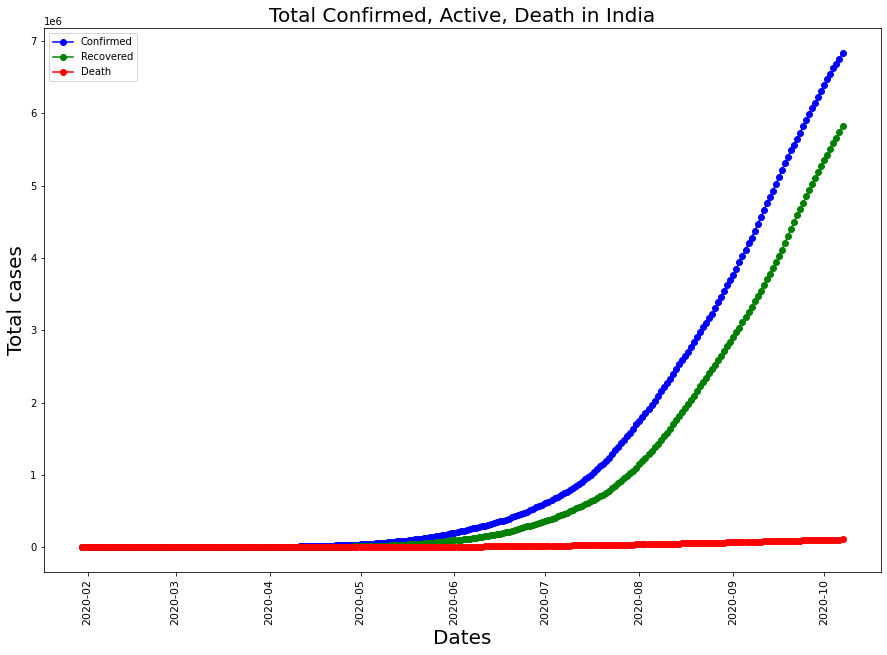

In [36]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

### Total Samples Tested

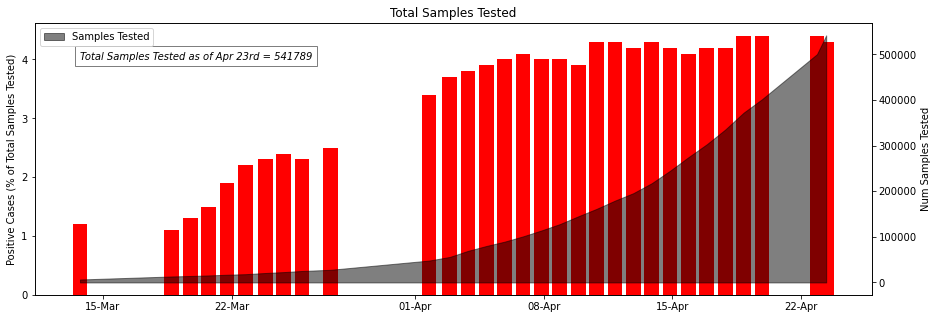

In [37]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize= (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'] , ICMR_details['Percent_positive'], color="red",label = 'Percentage of Positive Cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of Apr 23rd = 541789', style='italic',fontsize= 10,
        bbox={'facecolor': 'white' ,'alpha': 0.5, 'pad': 5})

ax2 = ax1.twinx()  
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Num Samples Tested')
ax2.fill_between(ICMR_details['DateTime'],ICMR_details['TotalSamplesTested'],color = 'black',alpha = 0.5,label = 'Samples Tested');

plt.legend(loc="upper left")
plt.title('Total Samples Tested')
plt.show()


## Testing LIVE Status

In [38]:
import json
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [39]:
# save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

# first few rows
tested.tail()

,antigentests,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,othertests,peopleinicu,...,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_djhdx
6026,1221370,,,,,1243,12715,790,,,...,,,2383040,2426,107757,2409262,3397988,,04/10/2020,NaN
6027,1245401,,,,,1243,12715,790,,,...,,,2395040,2425,107761,2415262,3438128,,05/10/2020,NaN
6028,1267956,,,,,1243,12715,790,,,...,,,2405040,2413,107779,2420262,3480510,,06/10/2020,NaN
6029,1288884,,,,,1243,12715,790,,,...,,,2417040,2410,107787,2425262,3523161,,07/10/2020,NaN
6030,,,,,,1243,12715,790,,,...,,,2428040,2415,107792,2430262,3565602,,08/10/2020,NaN


In [40]:
# fix datatype
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [41]:
# save file as a scv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)


In [42]:
state_test_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max().reset_index()

In [43]:
state_test_cases[:-50]

,updatedon,state,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
0,2020-01-04,Delhi,2621,19814000,0.00%,,0.13,
1,2020-01-04,Kerala,7965,35125000,3.33%,30,0.23,622
2,2020-01-04,West Bengal,659,96906000,5.61%,18,0.01,
3,2020-01-05,Andaman and Nicobar Islands,3754,397000,0.88%,114,9.46,643
4,2020-01-05,Andhra Pradesh,102460,52221000,1.43%,70,1.96,
...,...,...,...,...,...,...,...,...
5975,2020-12-08,Jammu and Kashmir,750847,13203000,3.52%,28,56.87,42494
5976,2020-12-08,Jharkhand,402072,37403000,5.04%,20,10.75,
5977,2020-12-08,Karnataka,1826317,65798000,0.00%,,27.76,289355
5978,2020-12-08,Kerala,1056360,35125000,3.61%,28,30.07,12426


In [44]:
state_test_cases = tested.groupby('state')['totaltested','populationncp2019projection','testpositivityrate',	'testsperpositivecase',	'testsperthousand','totalpeoplecurrentlyinquarantine'].max()
state_test_cases['testpositivityrate'] = state_test_cases['testpositivityrate'].str.replace('%', '')

In [45]:
state_test_cases = state_test_cases.apply(pd.to_numeric)

In [46]:
state_test_cases.nunique()

totaltested                         35
populationncp2019projection         34
testpositivityrate                  34
testsperpositivecase                19
testsperthousand                    25
totalpeoplecurrentlyinquarantine    28
dtype: int64

In [47]:
state_test_cases.sort_values('totaltested', ascending= False).style.background_gradient(cmap='Blues',subset=["totaltested"])\
                        .background_gradient(cmap='Blues',subset=["populationncp2019projection"])\
                        .background_gradient(cmap='Blues',subset=["testpositivityrate"])\
                        .background_gradient(cmap='Blues',subset=["testsperpositivecase"])\
                        .background_gradient(cmap='Blues',subset=["testsperthousand"])\
                        .background_gradient(cmap='Blues',subset=["totalpeoplecurrentlyinquarantine"])
                       

,totaltested,populationncp2019projection,testpositivityrate,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine
state,,,,,,
Uttar Pradesh,9937675,224979000,5.290000,41,9.820000,9911.000000
Karnataka,999530,65798000,9.880000,99,9.930000,97821.000000
Chhattisgarh,998347,28724000,4.160000,95,9.970000,924.000000
Andhra Pradesh,996573,52221000,9.290000,94,9.770000,nan
Jammu and Kashmir,996481,13203000,6.990000,80,9.880000,89.000000
Maharashtra,995343,122153000,9.070000,9,9.780000,39831.000000
Punjab,988119,29859000,4.800000,61,9.860000,1711.000000
Gujarat,987630,67936000,9.150000,27,9.830000,88864.000000
Rajasthan,987272,77264000,3.300000,49,9.970000,nan


### Day-by-Day Confirmed Cases in Top 15 States in India

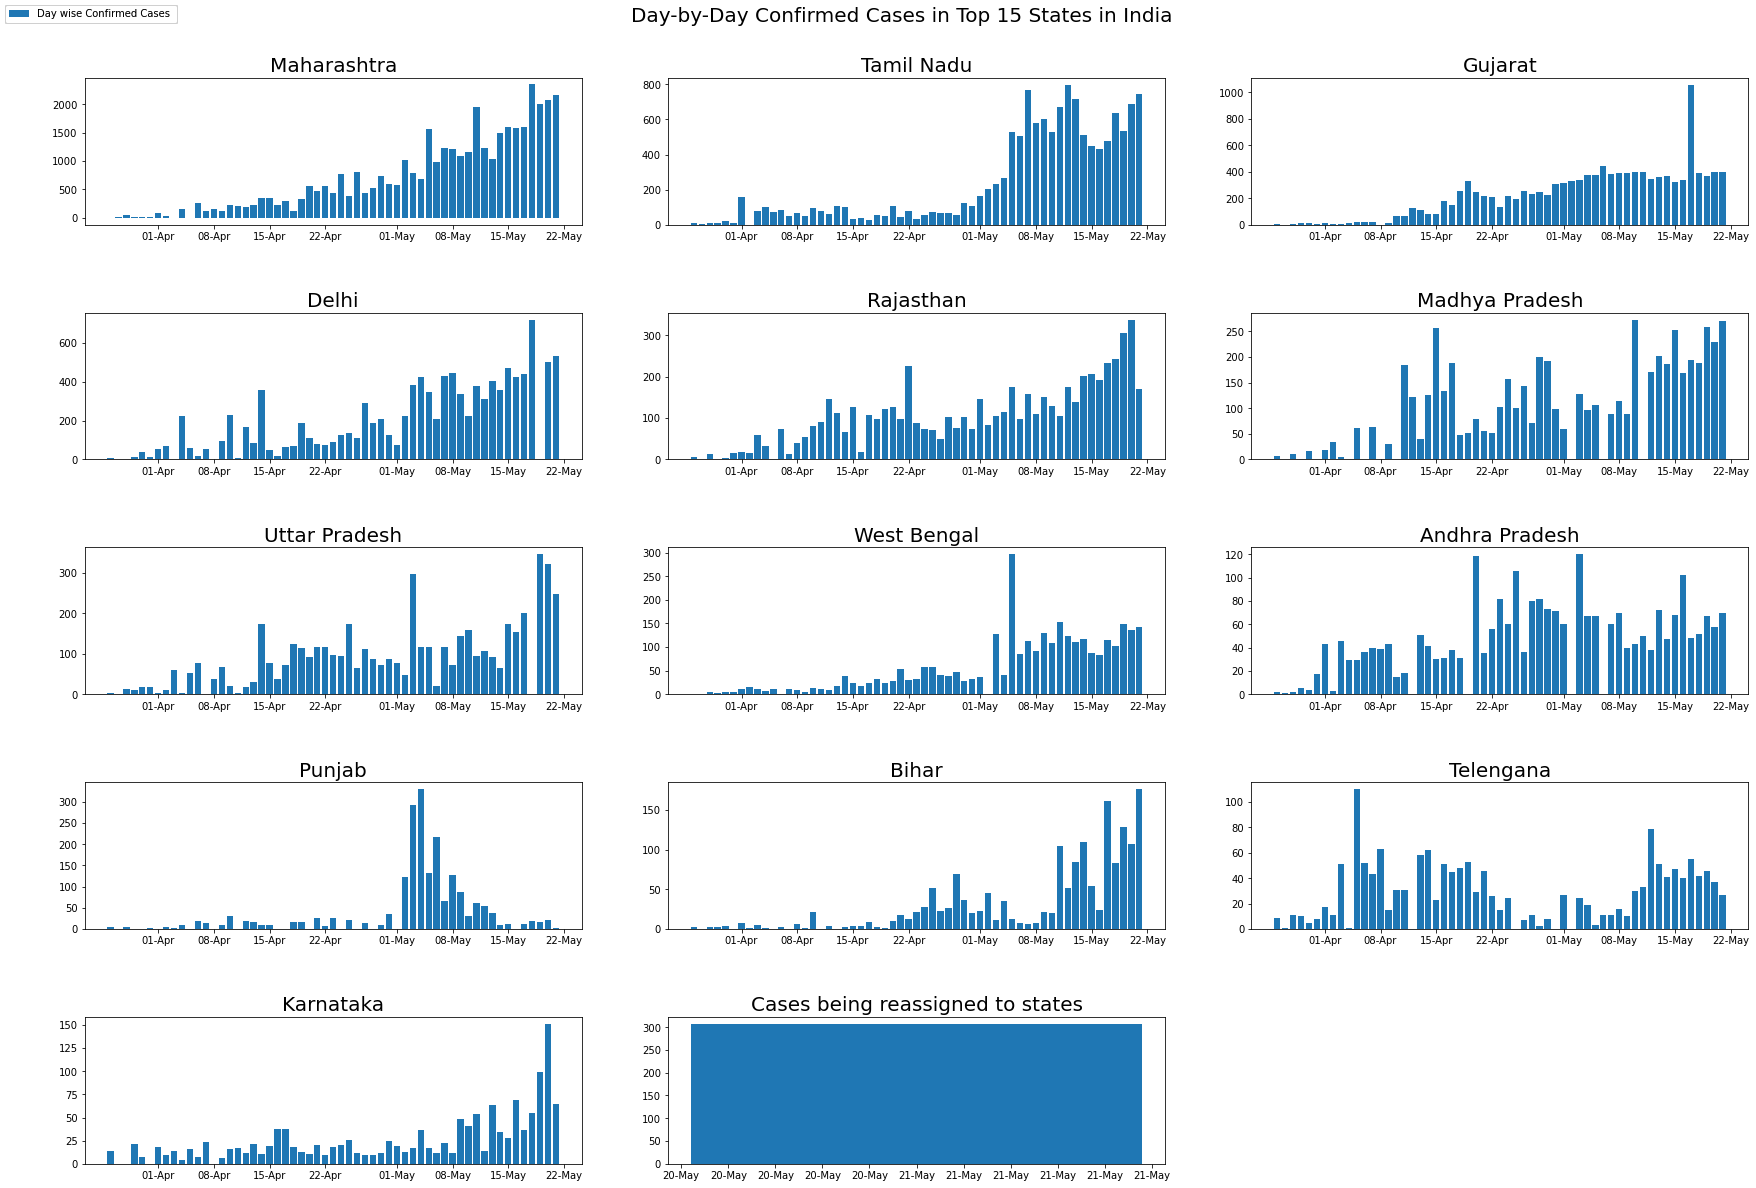

In [48]:
all_state = list(df_India['State/UnionTerritory'].unique())

latest = india_covid_19[india_covid_19['Date'] > '24-03-20']
state_cases = latest.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
latest['Active'] = latest['Confirmed'] - (latest['Deaths']- latest['Cured'])
state_cases = state_cases.sort_values('Confirmed', ascending= False).fillna(0)
states =list(state_cases['State/UnionTerritory'][0:15])

states_confirmed = {}
states_deaths = {}
states_recovered = {}
states_dates = {}

for state in states:
    df = latest[latest['State/UnionTerritory'] == state].reset_index()
    k = []
    l = []
    m = []
    n = []
    for i in range(1,len(df)):
        k.append(df['Confirmed'][i]-df['Confirmed'][i-1])
        l.append(df['Deaths'][i]-df['Deaths'][i-1])
        m.append(df['Cured'][i]-df['Cured'][i-1])
        n.append(df['Active'][i]-df['Active'][i-1])
    states_confirmed[state] = k
    states_deaths[state] = l
    states_recovered[state] = m
#     states_active[state] = n
    date = list(df['Date'])
    states_dates[state] = date[1:]
    
fig = plt.figure(figsize= (25,17))
plt.suptitle('Day-by-Day Confirmed Cases in Top 15 States in India',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=5.0)

### Growth Rate in top 15 States in India

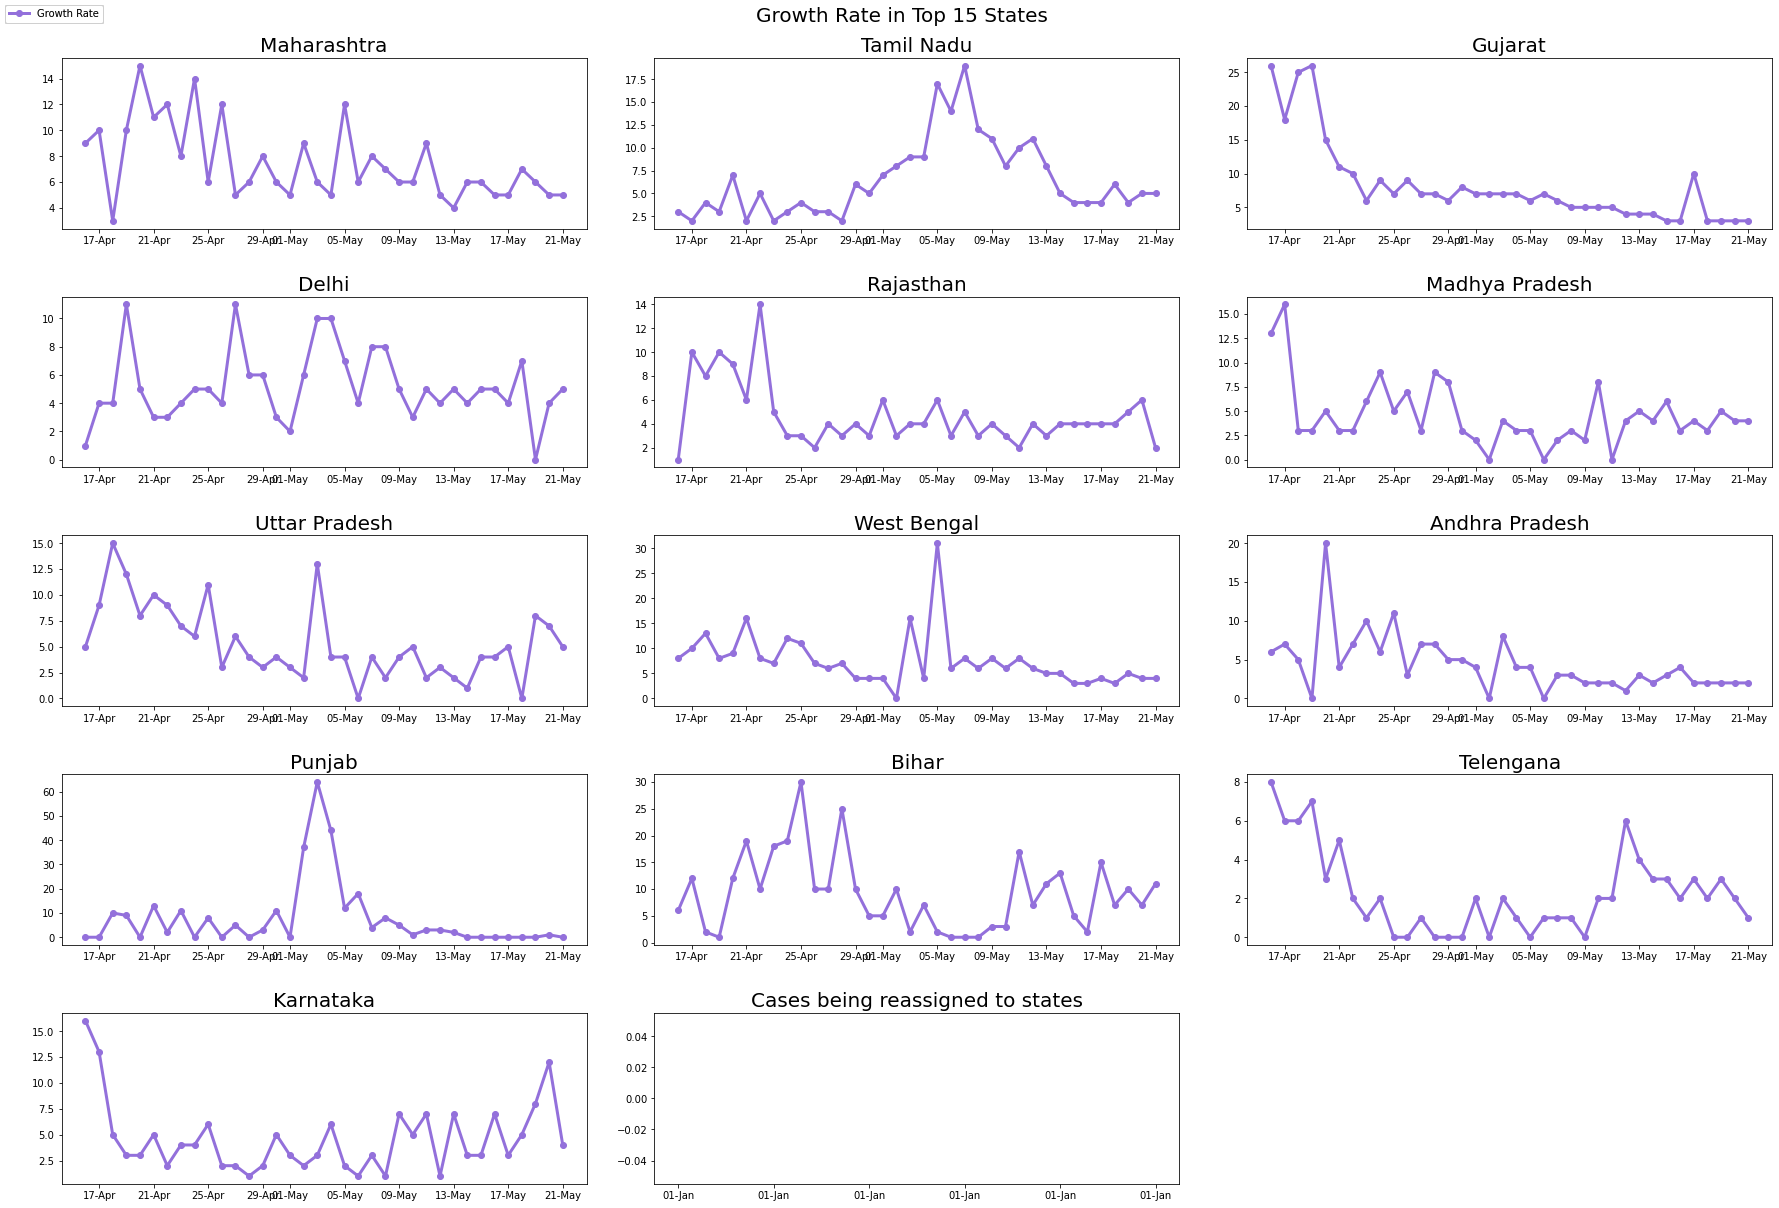

In [49]:
def calc_growthRate(values):
    k = []
    for i in range(1,len(values)):
        summ = 0
        for j in range(i):
            summ = summ + values[j]
        rate = (values[i]/summ)*100
        k.append(int(rate))
    return k

fig = plt.figure(figsize= (25,17))
plt.suptitle('Growth Rate in Top 15 States',fontsize = 20,y=1.0)
k=0
for i in range(1,15):
    ax = fig.add_subplot(5,3,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    #ax.bar(states_dates[states[k]],states_confirmed[states[k]],label = 'Day wise Confirmed Cases ') 
    growth_rate = calc_growthRate(states_confirmed[states[k]])
    ax.plot_date(states_dates[states[k]][21:],growth_rate[20:],color = '#9370db',label = 'Growth Rate',linewidth =3,linestyle='-')  
    plt.title(states[k],fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1
plt.tight_layout(pad=3.0)

Though being highly populated the relative confimred cases of India is low compared to other countries. This could be because of two reasons:
- 67 days lockdown imposed by prime minister Narendra Modi in several stages (Source : [Health Ministry](http://www.indiatoday.in/india/story/without-lockdown-india-would-have-2-lakh-covid-19-cases-by-now-health-ministry-1665903-2020-04-11))
- Low testing rate (Source: [news18](https://www.news18.com/news/india/with-just-18-tests-per-million-of-population-why-indias-low-testing-rate-for-coronavirus-is-worrying-2552845.html))

## Exploring different types of hospital beds available in India during lockdown

In [50]:
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

hospital_beds = hospital_beds.drop('Sno',axis=1)

In [51]:
hospital_beds.head(36)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936
5,Chandigarh,40,2,1.0,4,47,3756,0,0,4,778
6,Chhattisgarh,813,166,12.0,32,1023,14354,169,5070,45,4342
7,Dadra & Nagar Haveli,9,2,1.0,1,13,568,10,273,1,316
8,Daman & Diu,4,2,NaN,2,8,298,5,240,0,0
9,Delhi,534,25,9.0,47,615,20572,0,0,109,24383


## Exploring top 10 States in each health facilities

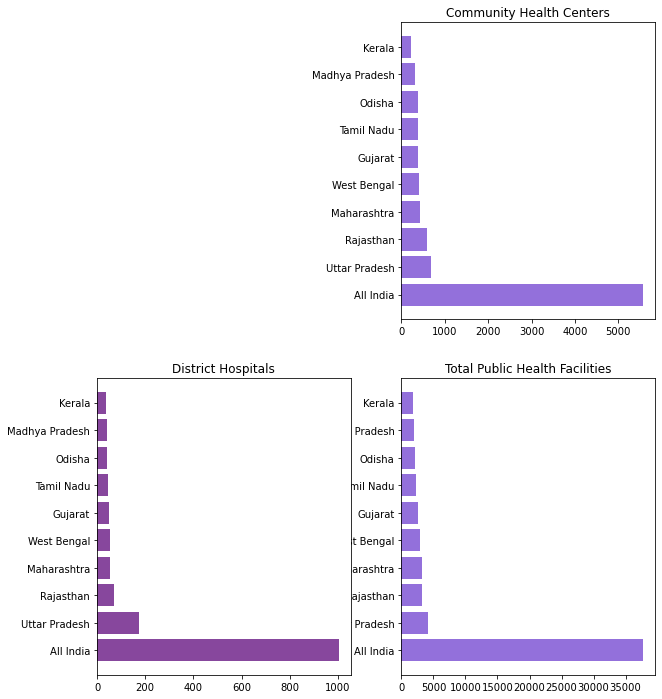

In [59]:
# top_10_primary = hospital_beds.nlargest(10,'NumPrimaryHealthCenters_HMIS')
top_10_community = hospital_beds.nlargest(10,'NumCommunityHealthCenters_HMIS')
top_10_district_hospitals = hospital_beds.nlargest(10,'NumDistrictHospitals_HMIS')
top_10_public_facility = hospital_beds.nlargest(10,'TotalPublicHealthFacilities_HMIS')
top_10_public_beds = hospital_beds.nlargest(10,'NumPublicBeds_HMIS')

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'],top_10_community['NumCommunityHealthCenters_HMIS'],color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Facilities')
plt.barh(top_10_community['State/UT'],top_10_public_facility['TotalPublicHealthFacilities_HMIS'],color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'],top_10_district_hospitals['NumDistrictHospitals_HMIS'],color = '#87479d');

## Exploring Urban and Rural Healthcare Facility

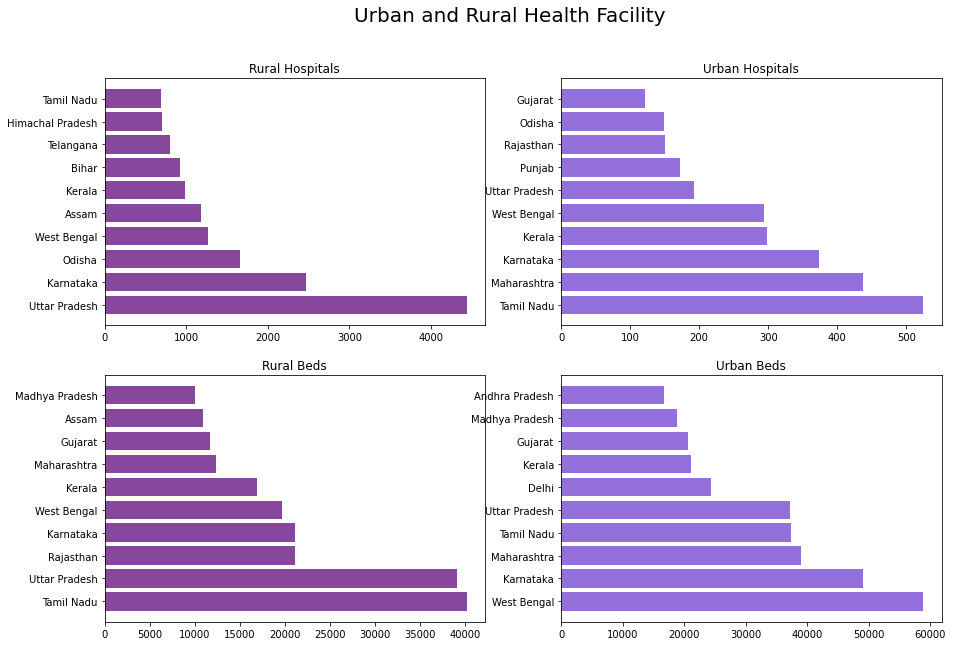

In [ ]:
top_rural_hos = hospital_beds.nlargest(10,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds.nlargest(10,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds.nlargest(10,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds.nlargest(10,'NumUrbanBeds_NHP18')

plt.figure(figsize=(15,10))
plt.suptitle('Urban and Rural Health Facility',fontsize=20)
plt.subplot(221)
plt.title('Rural Hospitals')
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = '#87479d');

plt.subplot(222)
plt.title('Urban Hospitals')
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = '#9370db');

plt.subplot(223)
plt.title('Rural Beds')
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = '#87479d');

plt.subplot(224)
plt.title('Urban Beds')
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = '#9370db');

## Exploring Statewise Testing Insights

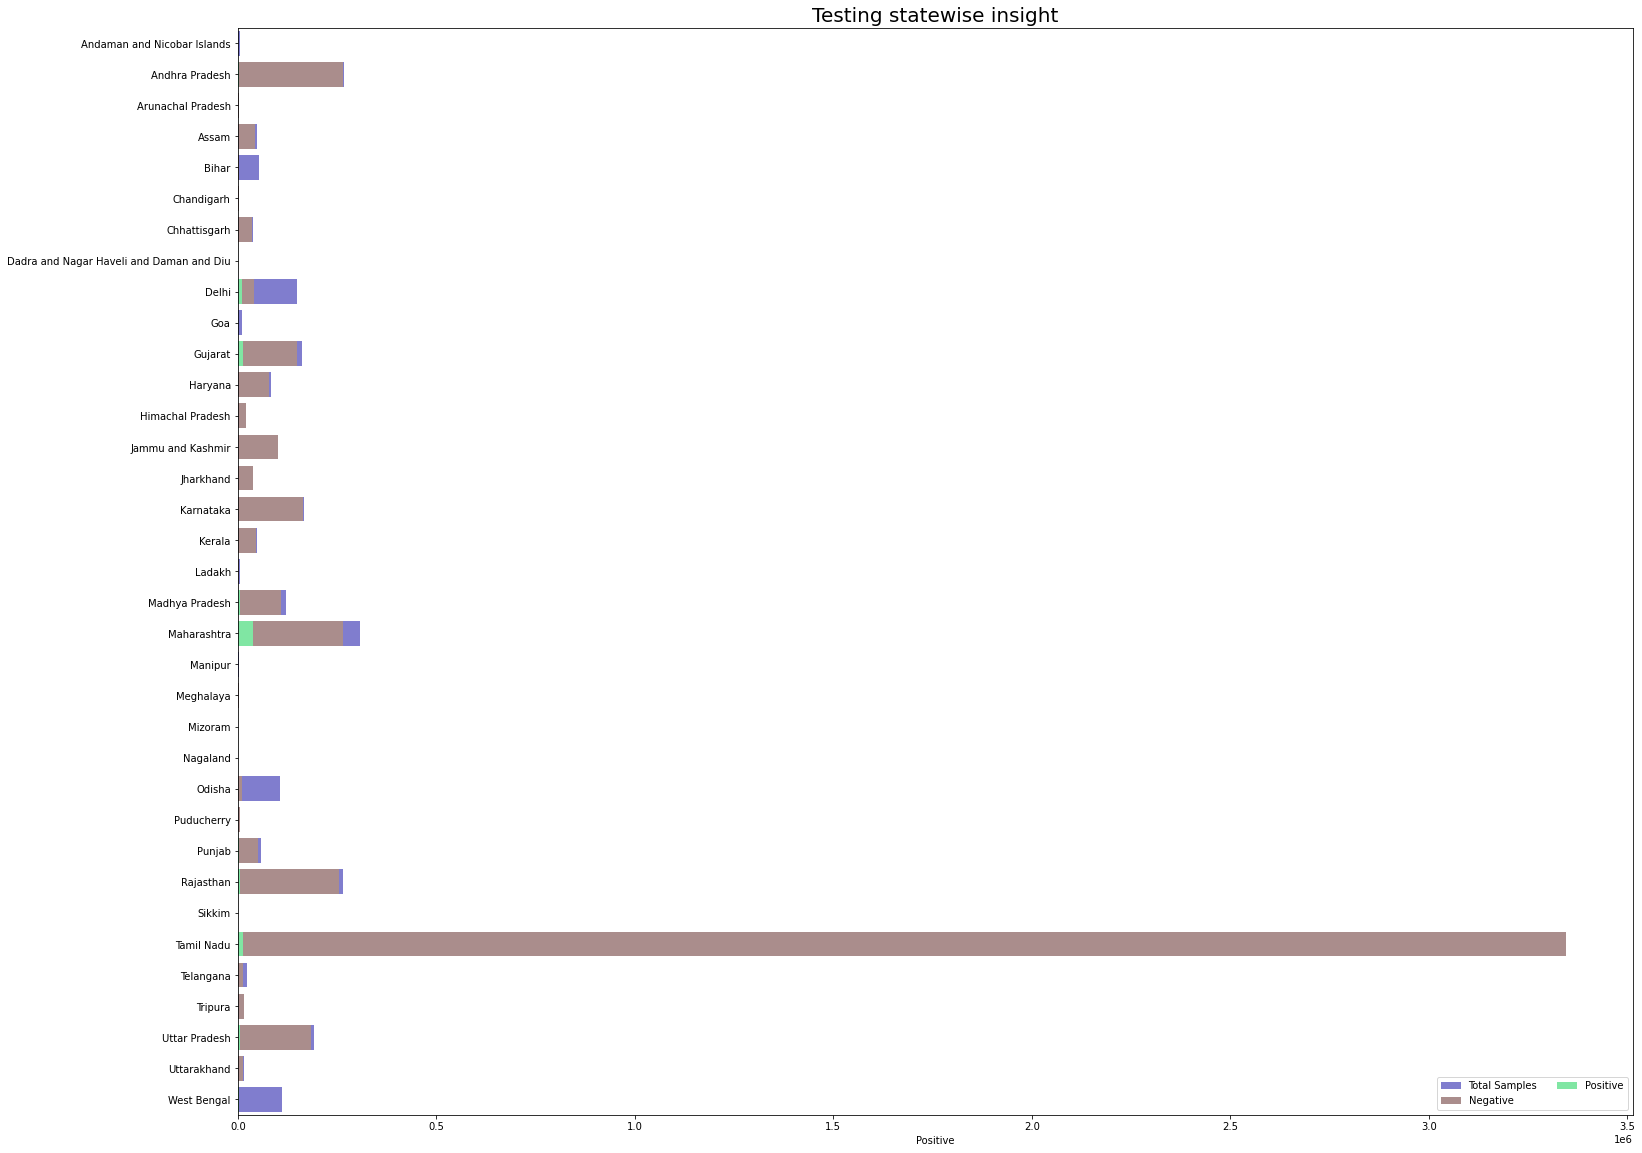

In [ ]:
state_test = pd.pivot_table(state_testing, values=['TotalSamples','Negative','Positive'], index='State', aggfunc='max')
state_names = list(state_test.index)
state_test['State'] = state_names

plt.figure(figsize=(25,20))
sns.set_color_codes("pastel")
sns.barplot(x="TotalSamples", y= state_names, data=state_test,label="Total Samples", color = '#7370db')
sns.barplot(x='Negative', y=state_names, data=state_test,label='Negative', color= '#af8887')
sns.barplot(x='Positive', y=state_names, data=state_test,label='Positive', color='#6ff79d')
plt.title('Testing statewise insight',fontsize = 20)
plt.legend(ncol=2, loc="lower right", frameon=True);

## Number of ICMR Testing Centres in each state

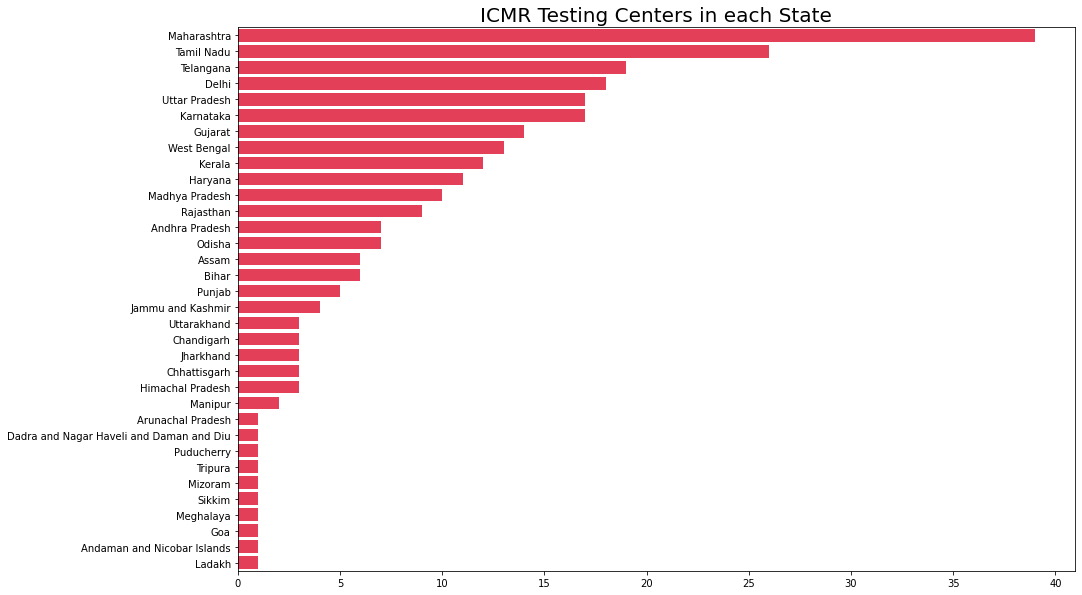

In [ ]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#ff2345');

## Let's Start with the predictions

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])


## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [195]:
!pip install Prophet

  Created wheel for Prophet: filename=prophet-0.1.1.post1-py3-none-any.whl size=13254 sha256=ba625745471e8c2acffc86c1c928c450f8274af8233d264d6f65a0cd31fff95f
  Stored in directory: c:\users\raghav\appdata\local\pip\cache\wheels\98\36\19\702df5440d2cf01c8221d08fb26bfe66e872100e7bfd75bb8f
Successfully built Prophet


In [ ]:
# !pip install pystan
# !pip install fbprophet

!conda install -c conda-forge fbprophet

In [49]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

k = df1[df1['Country/Region']=='India'].loc[:,'1/22/20':]
india_confirmed = k.values.tolist()[0] 
data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = dates
data['y'] = india_confirmed

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.


## 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [53]:
prop = Prophet(interval_width=0.95)
prop.fit(data)
future = prop.make_future_dataframe(periods=15)
future.tail(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
253,2020-10-01
254,2020-10-02
255,2020-10-03
256,2020-10-04
257,2020-10-05
258,2020-10-06
259,2020-10-07
260,2020-10-08
261,2020-10-09
262,2020-10-10


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [54]:
#predicting the future with date, and upper and lower limit of y value
forecast = prop.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
263,2020-10-11,7.100590e+06,7.006306e+06,7.195882e+06
264,2020-10-12,7.178642e+06,7.074952e+06,7.289030e+06
265,2020-10-13,7.257725e+06,7.147775e+06,7.366396e+06
266,2020-10-14,7.336894e+06,7.217428e+06,7.455318e+06
267,2020-10-15,7.417946e+06,7.301104e+06,7.551448e+06


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

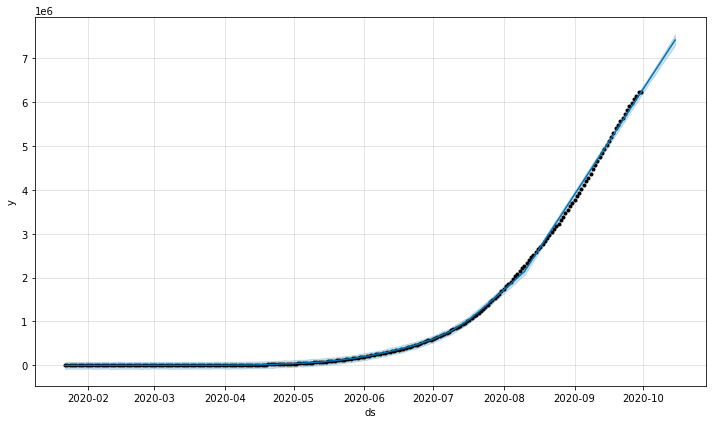

In [55]:
confirmed_forecast_plot = prop.plot(forecast)

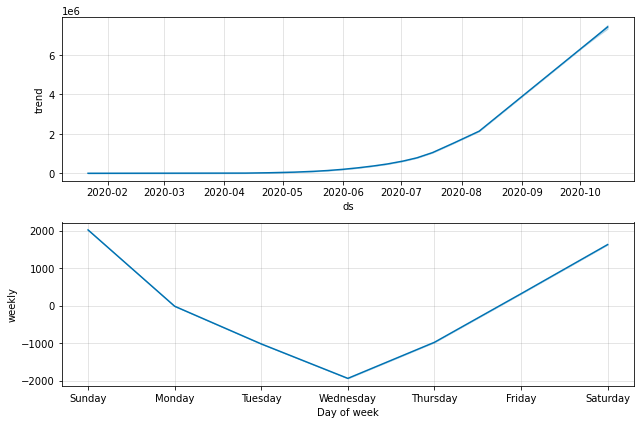

In [56]:
confirmed_forecast_plot =prop.plot_components(forecast)

## ARIMA Model

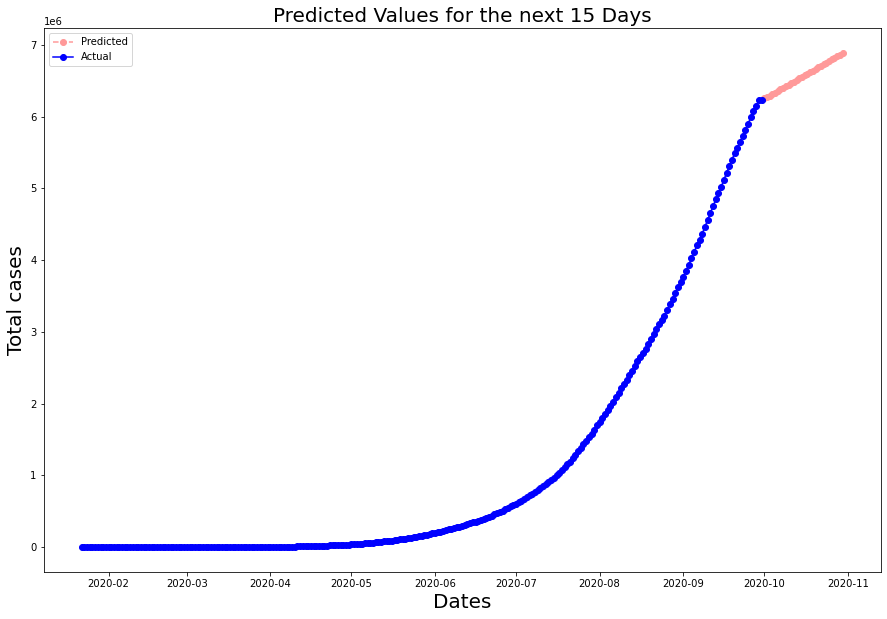

In [57]:
from statsmodels.tsa.arima_model import ARIMA

from datetime import timedelta 

arima = ARIMA(data['y'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date = data['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=data['y'],x=data['ds'],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

## 1.4 Visualising the spread geographically

In [73]:
# df_India.head()
df = df_India.dropna(subset = ["Latitude","Longitude"], inplace=True)

In [79]:
# Learn how to use folium to create a zoomable map
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_India['Latitude'], df_India['Longitude'], df_India['Confirmed'], df_India['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.002, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.09 ).add_to(map)
map

#Part 3:  Exploring World wide data


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

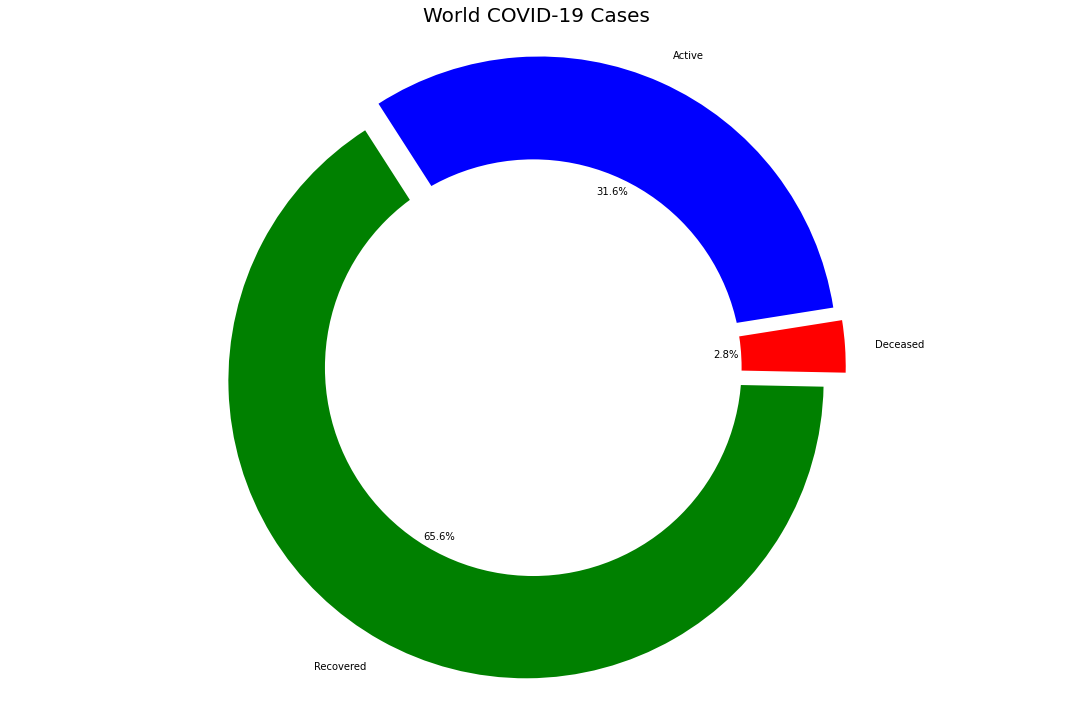

In [80]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['blue','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [81]:
dates

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00'),
 Timestamp('2020-01-25 00:00:00'),
 Timestamp('2020-01-26 00:00:00'),
 Timestamp('2020-01-27 00:00:00'),
 Timestamp('2020-01-28 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-01-30 00:00:00'),
 Timestamp('2020-01-31 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-02-02 00:00:00'),
 Timestamp('2020-02-03 00:00:00'),
 Timestamp('2020-02-04 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-02-07 00:00:00'),
 Timestamp('2020-02-08 00:00:00'),
 Timestamp('2020-02-09 00:00:00'),
 Timestamp('2020-02-10 00:00:00'),
 Timestamp('2020-02-11 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-13 00:00:00'),
 Timestamp('2020-02-14 00:00:00'),
 Timestamp('2020-02-15 00:00:00'),
 Timestamp('2020-02-16 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-02-18 00:00:00'),
 Timestamp('2020-02-

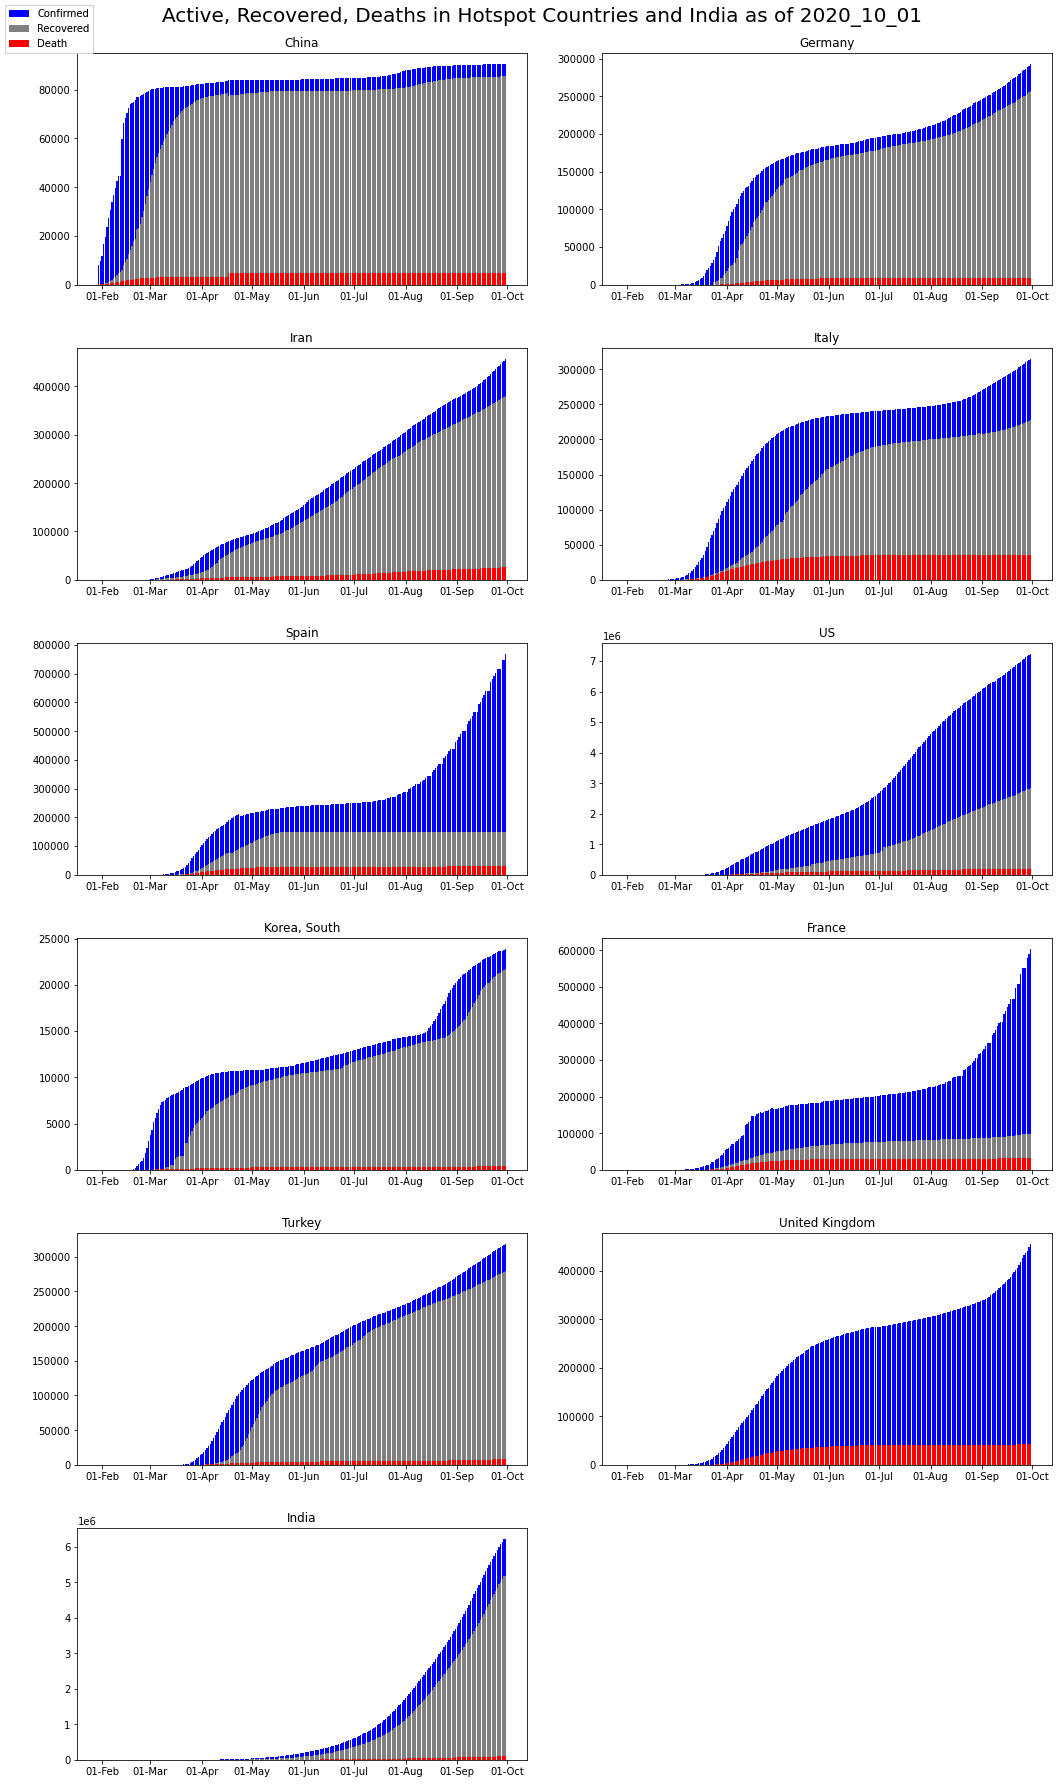

In [82]:
hotspots = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','Turkey','United Kingdom','India']
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

global_confirmed = {}
global_deaths = {}
global_recovered = {}
global_active= {}

for country in hotspots:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed[country] = k.values.tolist()[0]

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths[country] = k.values.tolist()[0]

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_recovered[country] = k.values.tolist()[0]
    
# for country in hotspots:
#     k = list(map(int.__sub__, global_confirmed[country], global_deaths[country]))
#     global_active[country] = list(map(int.__sub__, k, global_recovered[country]))
    
fig = plt.figure(figsize= (15,25))
plt.suptitle('Active, Recovered, Deaths in Hotspot Countries and India as of '+ today,fontsize = 20,y=1.0)
#plt.legend()
k=0
for i in range(1,12):
    ax = fig.add_subplot(6,2,i)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # ax.bar(dates_india,global_active[hotspots[k]],color = 'green',alpha = 0.6,label = 'Active');
    ax.bar(dates_india,global_confirmed[hotspots[k]],color='blue',label = 'Confirmed');
    ax.bar(dates_india,global_recovered[hotspots[k]],color='grey',label = 'Recovered');
    ax.bar(dates_india,global_deaths[hotspots[k]],color='red',label = 'Death');   
    plt.title(hotspots[k])
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper left')
    k=k+1

plt.tight_layout(pad=3.0)

In [83]:
countries = ['China','Germany','Iran','Italy','Spain','US','Korea, South','France','United Kingdom','India']

global_confirmed = []
global_recovered = []
global_deaths = []

for country in countries:
    k =df1[df1['Country/Region'] == country].loc[:,'1/30/20':]
    global_confirmed.append(k.values.tolist()[0]) 

    k =df2[df2['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0]) 

    k =df3[df3['Country/Region'] == country].loc[:,'1/30/20':]
    global_deaths.append(k.values.tolist()[0])  

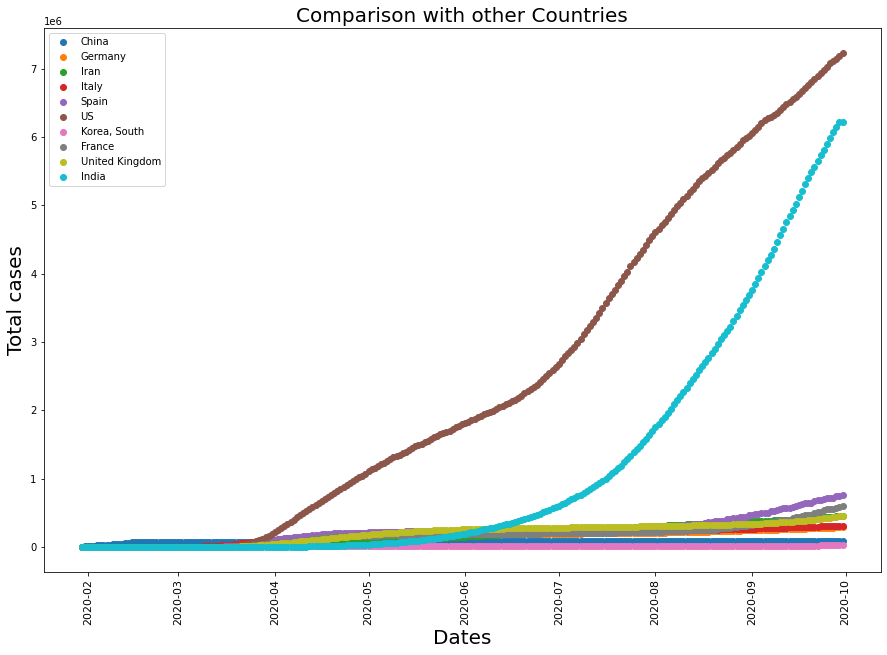

In [84]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Comparison with other Countries" , fontsize = 20)

for i in range(len(countries)):
    plt.plot_date(y= global_confirmed[i],x= dates_india,label = countries[i])
plt.legend();

# COVID-19 Symptoms


![alt text](https://imgur.com/QL4rZoa.jpg)

SOURCE: www.cdc.gov/coronavirus

# **Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
- https://www.worldometers.info/coronavirus/#countries
- https://api.covid19india.org/

The latest data can also be extracted from the available APIs and reading the json. Below are the API list that have been provided by crowd sourced. Extract and use these data to find meaningful insights.

- [National time series, statewise stats and test counts](https://api.covid19india.org/data.json)
- [State-district-wise](https://api.covid19india.org/state_district_wise.json)
[State-district-wise V2](https://api.covid19india.org/v2/state_district_wise.json)
- [Travel history](https://api.covid19india.org/travel_history.json)
- [Raw data](https://api.covid19india.org/raw_data.json)
- [States Daily changes](https://api.covid19india.org/states_daily.json)
- [Statewise Tested Numbers](https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv)


## Extracting data from [Hirokuapp](https://www.worldometers.info/coronavirus/#countries)

In [4]:
api = pd.read_json('https://corona-virus-stats.herokuapp.com/api/v1/cases/countries-search')

In [5]:
json_data = api['data']['rows']

In [7]:
from pandas.io.json import json_normalize

data = json_normalize(json_data)
data

,country,country_abbreviation,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,cases_per_mill_pop,flag
0,World,,"4,525,103","3,077","303,351",269,"1,703,742","2,518,010","45,560",581.0,https://upload.wikimedia.org/wikipedia/commons...
1,USA,US,"1,457,593",0,"86,912",0,"318,027","1,052,654","16,240","4,404.0",https://www.worldometers.info/img/flags/us-fla...
2,Spain,ES,"272,646",0,"27,321",0,"186,480","58,845","1,376","5,831.0",https://www.worldometers.info/img/flags/sp-fla...
3,Russia,RU,"252,245",0,"2,305",0,"53,530","196,410","2,300","1,728.0",https://www.worldometers.info/img/flags/rs-fla...
4,UK,GB,"233,151",0,"33,614",0,N/A,"199,193","1,559","3,434.0",https://www.worldometers.info/img/flags/uk-fla...
5,Italy,IT,"223,096",0,"31,368",0,"115,288","76,440",855,"3,690.0",https://www.worldometers.info/img/flags/it-fla...
6,Brazil,BR,"203,165",247,"13,999",6,"79,479","109,687","8,318",956.0,https://www.worldometers.info/img/flags/br-fla...
7,France,FR,"178,870",0,"27,425",0,"59,605","91,840","2,299","2,740.0",https://www.worldometers.info/img/flags/fr-fla...
8,Germany,DE,"174,975",0,"7,928",0,"150,300","16,747","1,329","2,088.0",https://www.worldometers.info/img/flags/gm-fla...
9,Turkey,TR,"144,749",0,"4,007",0,"104,030","36,712",963,"1,716.0",https://www.worldometers.info/img/flags/tu-fla...


### Collecting Data for Statewise Insights

In [10]:
# to parse json contents
import json
# to parse csv files
import csv
import requests

In [11]:
# get response from the web page for LIVE data
response = requests.get('https://api.covid19india.org/raw_data3.json')
# get contents from the response
content = response.content
# parse the json file
parsed = json.loads(content)
# keys
parsed.keys()

dict_keys(['raw_data'])

In [12]:
# save to df
df = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df.shape)

# # list of columns
print(df.columns)

# # first few rows
df.head()

(10020, 20)
Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,,,Hospitalized,27/04/2020,,,West Bengal,1,,,Details awaited,38,27892,mohfw.gov.in,,,WB,,,
1,,,Hospitalized,27/04/2020,,Bhilwara,Rajasthan,2,,,Details awaited,2,27893,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
2,,,Hospitalized,27/04/2020,,Jaipur,Rajasthan,3,,,Details awaited,9,27894,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
3,28,,Deceased,27/04/2020,Surajpol,Jaipur,Rajasthan,4,M,,Details awaited,1,27895,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,
4,,,Hospitalized,27/04/2020,,Jaisalmer,Rajasthan,5,,,Details awaited,1,27896,https://twitter.com/ANI/status/125461859651442...,,,RJ,,,


In [13]:
# creating patient id column from patient number
# ===============================================

df['p_id'] = df['patientnumber'].apply(lambda x : 'P'+str(x))
df.columns

Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission', 'p_id'],
      dtype='object')

### Rearrange and rename columns

In [14]:
# order of columns
cols = ['patientnumber', 'p_id', 'statepatientnumber', 
        'dateannounced', 'agebracket', 'gender', 
        'detectedcity', 'detecteddistrict', 'detectedstate', 'statecode', 'nationality',
        'typeoftransmission', 'contractedfromwhichpatientsuspected',
        'statuschangedate', 'currentstatus', 'source1', 'source2', 'source3', 'notes']

# rearrange columns
df = df[cols]

# rename columns
df.columns = ['patient_number', 'p_id', 'state_patient_number', 
              'date_announced', 'age_bracket', 'gender', 
              'detected_city', 'detected_district', 'detected_state', 'state_code', 'nationality',
              'type_of_transmission', 'contracted_from_which_patient_suspected',
              'status_change_date', 'current_status', 'source1', 'source2', 'source3', 'notes']

# dataframe shape
df.shape

(10020, 19)

In [15]:
# first 3 rows of the dataframe
df.head(3)

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,nationality,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,source1,source2,source3,notes
0,27892,P27892,,27/04/2020,,,,,West Bengal,WB,,,,,Hospitalized,mohfw.gov.in,,,Details awaited
1,27893,P27893,,27/04/2020,,,,Bhilwara,Rajasthan,RJ,,,,,Hospitalized,https://twitter.com/ANI/status/125461859651442...,,,Details awaited
2,27894,P27894,,27/04/2020,,,,Jaipur,Rajasthan,RJ,,,,,Hospitalized,https://twitter.com/ANI/status/125461859651442...,,,Details awaited


### Missing values

In [16]:
# no. of empty values in each column
# ==================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]==''].shape[0])

(10020, 19) 

patient_number 	 12
p_id 	 0
state_patient_number 	 4882
date_announced 	 0
age_bracket 	 4837
gender 	 5366
detected_city 	 9599
detected_district 	 86
detected_state 	 5
state_code 	 5
nationality 	 10020
type_of_transmission 	 10020
contracted_from_which_patient_suspected 	 9779
status_change_date 	 10020
current_status 	 0
source1 	 65
source2 	 9940
source3 	 9989
notes 	 8089


In [17]:
# no. of non-empty values in each column
# ===================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]!=''].shape[0])

(10020, 19) 

patient_number 	 10008
p_id 	 10020
state_patient_number 	 5138
date_announced 	 10020
age_bracket 	 5183
gender 	 4654
detected_city 	 421
detected_district 	 9934
detected_state 	 10015
state_code 	 10015
nationality 	 0
type_of_transmission 	 0
contracted_from_which_patient_suspected 	 241
status_change_date 	 0
current_status 	 10020
source1 	 9955
source2 	 80
source3 	 31
notes 	 1931


In [20]:
# replacing empty strings with np.nan
# ==================================-

print(df.shape)

df = df.replace(r'', np.nan, regex=True)
df.isna().sum()

(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

In [21]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

print(df.shape)

# df.dropna(subset=['detected_state'], inplace=True)

print(df.shape)
df.isna().sum()

(10020, 19)
(10020, 19)


patient_number                                12
p_id                                           0
state_patient_number                        4882
date_announced                                 0
age_bracket                                 4837
gender                                      5366
detected_city                               9599
detected_district                             86
detected_state                                 5
state_code                                     5
nationality                                10020
type_of_transmission                       10020
contracted_from_which_patient_suspected     9779
status_change_date                         10020
current_status                                 0
source1                                       65
source2                                     9940
source3                                     9989
notes                                       8089
dtype: int64

### Save data

In [22]:
# save to csv`
df.to_csv('patients_data.csv', index=False)

## Collecting Some more Statewise Data

In [23]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [24]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [25]:
# save data in a dataframe
th = pd.DataFrame(parsed['states_tested_data'])

# first few rows
th

,antigentests,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,othertests,peopleinicu,...,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_djhdx
0,,,,1210,,,50,,,,...,117,3.53,,,,,1403,181,17/04/2020,NaN
1,,,,,280,,50,,,,...,99,6.75,,614,347,,2679,246,24/04/2020,NaN
2,,,,,298,,50,,,,...,86,7.17,,724,420,,2848,106,27/04/2020,NaN
3,,,,,340,,50,,,,...,114,9.46,,643,556,,3754,199,01/05/2020,NaN
4,,,,,471,,98,,,,...,202,16.82,,16,1196,,6677,136,16/05/2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,1057947,,,,,1243,12675,790,,,...,,,2298040,2444,107697,2370262,3098657,,27/09/2020,NaN
5804,1082706,,,,,1243,12675,790,,,...,,,2308040,2447,107712,2375262,3139938,,28/09/2020,NaN
5805,1107750,,,,,1243,12675,790,,,...,,,2323040,2439,107706,2381262,3183697,,29/09/2020,NaN
5806,1131535,,,,,1243,12715,790,,,...,,,2335040,2442,107721,2387262,3227462,,30/09/2020,NaN


In [26]:
th.columns

Index(['antigentests', 'coronaenquirycalls', 'cumulativepeopleinquarantine',
       'negative', 'numcallsstatehelpline', 'numicubeds', 'numisolationbeds',
       'numventilators', 'othertests', 'peopleinicu', 'peopleonventilators',
       'populationncp2019projection', 'positive', 'rtpcrtests', 'source1',
       'source2', 'source3', 'state', 'tagpeopleinquarantine',
       'tagtotaltested', 'testpositivityrate', 'testspermillion',
       'testsperpositivecase', 'testsperthousand', 'totaln95masks',
       'totalpeoplecurrentlyinquarantine', 'totalpeoplereleasedfromquarantine',
       'totalppe', 'totaltested', 'unconfirmed', 'updatedon', '_djhdx'],
      dtype='object')

In [27]:
# save to csv`
th.to_csv('tests_latest_state_level.csv', index=False)

In [28]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv

## Zones

In [29]:
# get response from the web page
response = requests.get('https://api.covid19india.org/zones.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['zones'])

In [30]:
zo = pd.DataFrame(parsed['zones'])
zo.head()

,district,districtcode,lastupdated,source,state,statecode,zone
0,Nicobars,AN_Nicobars,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,AN_North and Middle Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
2,South Andaman,AN_South Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Red
3,Anantapur,AP_Anantapur,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Orange
4,Chittoor,AP_Chittoor,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Red


In [ ]:
# save to csv`
zo.to_csv('zones.csv', index=False)

## National level daily

In [31]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)
parsed.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [32]:
national = pd.DataFrame(parsed['cases_time_series'])
national.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [33]:
national.columns

Index(['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'date',
       'totalconfirmed', 'totaldeceased', 'totalrecovered'],
      dtype='object')

In [34]:
national = national[['date', 'totalconfirmed', 'totaldeceased', 'totalrecovered', 
                     'dailyconfirmed', 'dailydeceased', 'dailyrecovered']]
national.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,30 January,1,0,0,1,0,0
1,31 January,1,0,0,0,0,0
2,01 February,1,0,0,0,0,0
3,02 February,2,0,0,1,0,0
4,03 February,3,0,0,1,0,0


In [35]:
# save to csv`
national.to_csv('nation_level_daily.csv', index=False)

## National level latest

In [36]:
state_level = pd.DataFrame(parsed['statewise'])
state_level.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,migratedother,recovered,state,statecode,statenotes
0,945551,6397896,99833,5936,29,2941,02/10/2020 12:20:45,918,5351594,Total,TT,
1,259006,1400922,37056,0,0,0,01/10/2020 23:39:43,434,1104426,Maharashtra,MH,[Sep 9] :239 cases have been removed from the ...
2,57858,700235,5869,0,0,0,01/10/2020 22:07:48,0,636508,Andhra Pradesh,AP,
3,46369,603290,9586,0,0,0,01/10/2020 18:46:44,0,547335,Tamil Nadu,TN,[July 22]: 444 backdated deceased entries adde...
4,110412,611837,8994,0,0,0,01/10/2020 22:07:49,19,492412,Karnataka,KA,


In [37]:
state_level.columns

Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'migratedother', 'recovered',
       'state', 'statecode', 'statenotes'],
      dtype='object')

In [38]:
state_level = state_level[['state', 'statecode', 'lastupdatedtime',  
                           'confirmed', 'active', 'deaths', 'recovered',
                           'deltaconfirmed', 'deltadeaths', 'deltarecovered', 'statenotes']]
state_level.head()

,state,statecode,lastupdatedtime,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered,statenotes
0,Total,TT,02/10/2020 12:20:45,6397896,945551,99833,5351594,5936,29,2941,
1,Maharashtra,MH,01/10/2020 23:39:43,1400922,259006,37056,1104426,0,0,0,[Sep 9] :239 cases have been removed from the ...
2,Andhra Pradesh,AP,01/10/2020 22:07:48,700235,57858,5869,636508,0,0,0,
3,Tamil Nadu,TN,01/10/2020 18:46:44,603290,46369,9586,547335,0,0,0,[July 22]: 444 backdated deceased entries adde...
4,Karnataka,KA,01/10/2020 22:07:49,611837,110412,8994,492412,0,0,0,


In [ ]:
# save to csv`
state_level.to_csv('state_level_latest.csv', index=False)